In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
sys.path.append("../utils")

In [11]:
import hamiltonian_utils as hu
import plot_utils as pu
import graph_transformation as gu

In [5]:
X = np.load("../../data/simulation/1000_35_like_true/amp_gr.npy")
Y = np.load("../../data/simulation/1000_35_like_true/populations_gr.npy")



In [7]:
from sklearn.model_selection import train_test_split 

In [8]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y)

In [22]:
hu.restore_arrays(x_tr[0])[0]

[[8, 2, 1, 0, 9], [11, 7, 4, 5, 3, 6, 10]]

In [20]:
def get_xy(x, y):
    pairs = gu.gr_to_pairs(x)[0]
    target = gu.make_y(y, pairs)

    return pairs, target

In [41]:
def arrays_to_pairs(pairs, arrays):
    new_pairs = dict(zip(pairs.keys(), np.zeros(len(pairs)).astype(int)))
    
    for arr in arrays:
        for a, b in zip(arr, arr[1:]):
            new_pairs[(a,b)]= 1
    
    return [x for x in new_pairs.values()]

In [42]:
from sklearn.metrics import roc_auc_score

In [46]:
all_t = []
all_p = []

for x, y in zip(x_te, y_te):
    pairs, target = get_xy(x, y)
    arrays  = hu.restore_arrays(x)[0]
    pred = arrays_to_pairs(pairs, arrays)
    all_t.extend(target)
    all_p.extend(pred)
    
    
    #print(roc_auc_score(target, pred))

In [47]:
print(roc_auc_score(all_t, all_p))

0.9737476806319586


In [48]:
import os
import pickle

In [50]:
es_answ_list = pickle.load(open("../../data/answers/ES_answers_50", 'rb'))

In [51]:
def lists_to_gr(lists, n):
    gr = np.zeros((n,n))
    for arr in lists:
        for a,b in zip(arr, arr[1:]):
            gr[a, b] = 1
            
    return gr

In [53]:
path = "../../data/graphs/ES/"
files = sorted(os.listdir(path))

In [54]:
ES_x = []
for f in files:
    ES_x.append(np.load(path + f)[:36, :36])


In [60]:
all_t = []
all_p = []

for x, y in zip(ES_x, es_answ_list):
    pairs = gu.gr_to_pairs(x)[0]
    arrays  = hu.restore_arrays(x)[0]
    
    #arrays_answ = hu.restore_arrays(y)[0]
    
    target = arrays_to_pairs(pairs, y)
    pred = arrays_to_pairs(pairs, arrays)
    all_t.extend(target)
    all_p.extend(pred)
    
    
    #print(roc_auc_score(target, pred))

In [61]:
print(roc_auc_score(target, pred))

0.9686848239479819


<Container object of 11 artists>

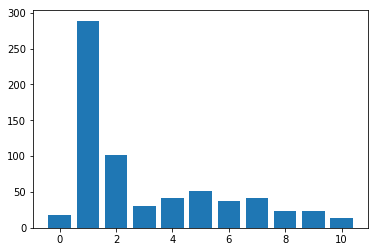

In [110]:
hist = hu.restore_arrays(ES_x[2])[1][2]
plt.bar(np.arange(len(hist)), hist)

## Naive

In [76]:
def treashold_graph(gr,t):
    pairs = []
    for a,b in zip(*np.where(gr > t)): 
        pairs.append((a,b))
    return pairs


In [99]:
def pairs_to_pairs(pairs, pairs_ones):
    new_pairs = dict(zip(pairs.keys(), np.zeros(len(pairs)).astype(int)))
    
    for p in pairs_ones:
#         if p in pairs:
        new_pairs[p]= 1
    
    return [x for x in new_pairs.values()]

In [85]:
for i in range(0, 200, 10): 
    all_t = []
    all_p = []

    for x, y in zip(ES_x, es_answ_list):
        pairs = gu.gr_to_pairs(x)[0]
        pairs_pred = treashold_graph(x, i)
        #arrays_answ = hu.restore_arrays(y)[0]

        target = arrays_to_pairs(pairs, y)
        pred = pairs_to_pairs(pairs, pairs_pred)

        all_t.extend(target)
        all_p.extend(pred)


    print(i, roc_auc_score(all_t, all_p))

0 0.5
10 0.8062763652947212
20 0.8737259149469844
30 0.9013624444191084
40 0.8897446129289704
50 0.8742902747691255
60 0.8648500741078554
70 0.8554098734465854
80 0.8547771063732755
90 0.8513510432105804
100 0.8482043096568237
110 0.8396762056778018
120 0.8410728537224945
130 0.8427488313761259
140 0.8384847793866149
150 0.8387641089955536
160 0.8393227682134307
170 0.8345000570060427
180 0.8350587162239197
190 0.8305153346254703


In [101]:
all_t = []
all_p = []

for x, y in zip(x_te, y_te):
    pairs, target = get_xy(x, y)
    pairs_pred = treashold_graph(x, 30)
    #arrays_answ = hu.restore_arrays(y)[0]

    #print(len(pairs), len(target))
    pred = pairs_to_pairs(pairs, pairs_pred)
    all_t.extend(target)
    all_p.extend(pred)
    
    #print(roc_auc_score(target, pred))
    
print(roc_auc_score(all_t, all_p))

0.8374255411884353
